In [31]:
import parse
import numpy as np

In [45]:
# Get all the pose sequences from the parser
# TODO: save these in the future
all_ps = parse.main()

# Consider only one of the PS. The order is:
# ['poses/bicep_bad_1', 'poses/bicep_bad_2', 'poses/bicep_bad_3', 'poses/bicep_bad_4', 'poses/bicep_bad_5', 'poses/bicep_bad_6', 'poses/bicep_bad_7', 'poses/bicep_bad_8', 'poses/bicep_bad_9', 'poses/bicep_good_1', 'poses/bicep_good_2', 'poses/bicep_good_3', 'poses/bicep_good_4', 'poses/bicep_good_5', 'poses/bicep_good_6']
ps = all_ps[9]

In [46]:
# Given a PS, we first want to identify which arm is in the viewpoint
# For every pose in the PS, count the number of times 
# shoulder/elbow/wrist is 0 for both left and right side.

# Count number of non-zeros in right and left
right_ct, left_ct = 0, 0

for pose in ps.poses:
    right_loc = [pose.rshoulder, pose.relbow, pose.rwrist]
    left_loc = [pose.lshoulder, pose.lelbow, pose.lwrist]
    for loc in right_loc:
        right_ct = right_ct + 1 if loc.x > 0 else right_ct
        right_ct = right_ct + 1 if loc.y > 0 else right_ct
    for loc in left_loc:
        left_ct = left_ct + 1 if loc.x > 0 else left_ct
        left_ct = left_ct + 1 if loc.y > 0 else left_ct

# Check which side has less 0's. Deal with tiebreaking later
side = "Right" if right_ct > left_ct else "Left"
print(side)

Right


In [47]:
# Things we want to compute:
# Vector of the upper arm (shoulder -> elbow)
# Vector of the torso (neck -> hip)
# Angle between upper arm and torso vector

upper_arm_vectors = []
torso_vectors = []
upper_arm_torso_angle = []

for pose in ps.poses:
    if side == "Right":
        joints = [pose.rshoulder, pose.relbow, pose.rwrist, pose.rhip]
    else:
        joints = [pose.lshoulder, pose.lelbow, pose.lwrist, pose.lhip]
        
    # Shoulder to elbow
    arm_vec = [joints[0].x - joints[1].x, joints[0].y - joints[1].y]
    upper_arm_vectors.append(arm_vec)
    
    # Neck to hip
    tor_vec = [pose.neck.x - joints[3].x, pose.neck.y - joints[3].y]
    torso_vectors.append(tor_vec)
    
    # Angle between upper arm and torso
    # Normalize to unit vectors
    arm_vec = arm_vec / np.linalg.norm(arm_vec)
    tor_vec = tor_vec / np.linalg.norm(tor_vec)
    angle = np.arccos(np.clip(np.dot(arm_vec, tor_vec), -1.0, 1.0))
    upper_arm_torso_angle.append(angle)
    
print(upper_arm_vectors[15])

[-0.07629788008820149, -0.5222389400446829]


(114, 2)


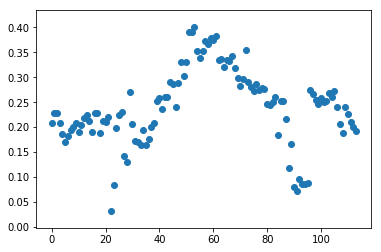

In [48]:
import matplotlib.pyplot as plt
upper_arm_vectors = np.array(upper_arm_vectors)
torso_vectors = np.array(torso_vectors)
upper_arm_torso_angle = np.array(upper_arm_torso_angle)
print(upper_arm_vectors.shape)
plt.scatter(np.arange(upper_arm_torso_angle.shape[0]),upper_arm_torso_angle)

(146, 2)


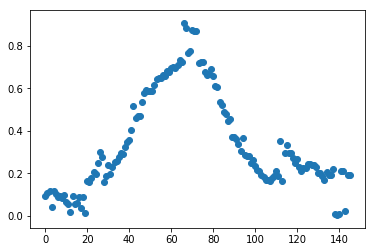

In [44]:
upper_arm_vectors = np.array(upper_arm_vectors)
torso_vectors = np.array(torso_vectors)
upper_arm_torso_angle = np.array(upper_arm_torso_angle)
print(upper_arm_vectors.shape)
plt.scatter(np.arange(upper_arm_torso_angle.shape[0]),upper_arm_torso_angle)